# 时间序列

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#模拟生成数据" data-toc-modified-id="模拟生成数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>模拟生成数据</a></span></li><li><span><a href="#简单的时间序列（自带电池实现）" data-toc-modified-id="简单的时间序列（自带电池实现）-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>简单的时间序列（自带电池实现）</a></span></li><li><span><a href="#共享X轴的时间序列" data-toc-modified-id="共享X轴的时间序列-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>共享X轴的时间序列</a></span></li></ul></div>

In [16]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'PingFang HK'

## 模拟生成数据 

In [5]:
df = pd.read_excel(r'../data/meteo.xls', index_col=0, usecols=[0, 2, 3], parse_dates=[0])
df

,气温(℃),湿度(%)
时间,,
2019-04-01 00:00:00,8.1,45
2019-04-01 01:00:00,8.5,43
2019-04-01 02:00:00,8.8,42
2019-04-01 03:00:00,10.1,39
2019-04-01 04:00:00,9.8,43
...,...,...
2019-04-30 19:00:00,20.0,66
2019-04-30 20:00:00,19.5,67
2019-04-30 21:00:00,19.2,68


## 简单的时间序列（自带电池实现）

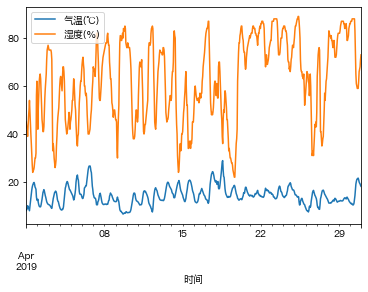

In [6]:
df.plot()
plt.show()

主要在于时间轴的描述不符合正常的使用情况，我们先围绕这点展开。-自定义x轴标尺

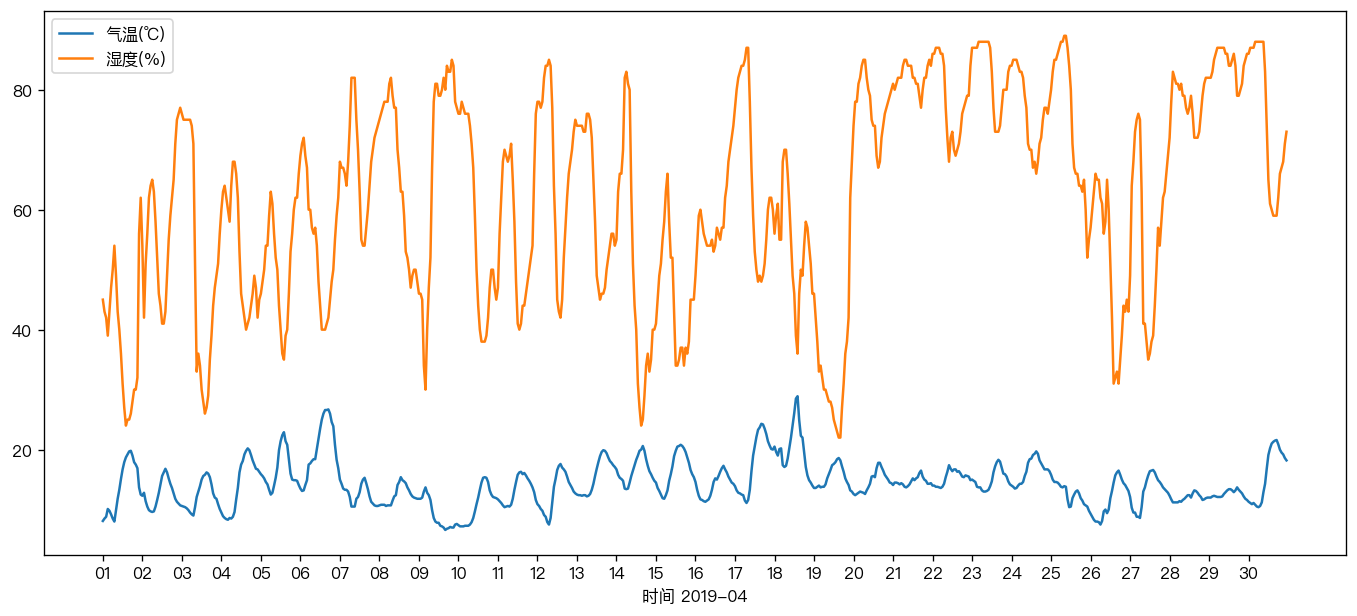

In [37]:
fig = plt.figure(figsize=(14, 6), dpi=120)
ax = fig.add_subplot(111)
# 开始绘图
ax.plot(df.iloc[:, 0].to_numpy(), label='气温(℃)')
ax.plot(df.iloc[:, 1].to_numpy(), label='湿度(%)')
# 处理x轴标尺
sep = 24
ticks = list(range(len(df)))
ax.set_xticks(ticks[::sep])
ax.set_xticklabels([xtick.strftime('%d') for xtick in list(df.index)[::sep]])
ax.set_xlabel('时间 2019-04')
ax.legend()
plt.show()

## 共享X轴的时间序列

我们可以将温度和湿度分开绘制，保持时间序列一致，便于对比分析。

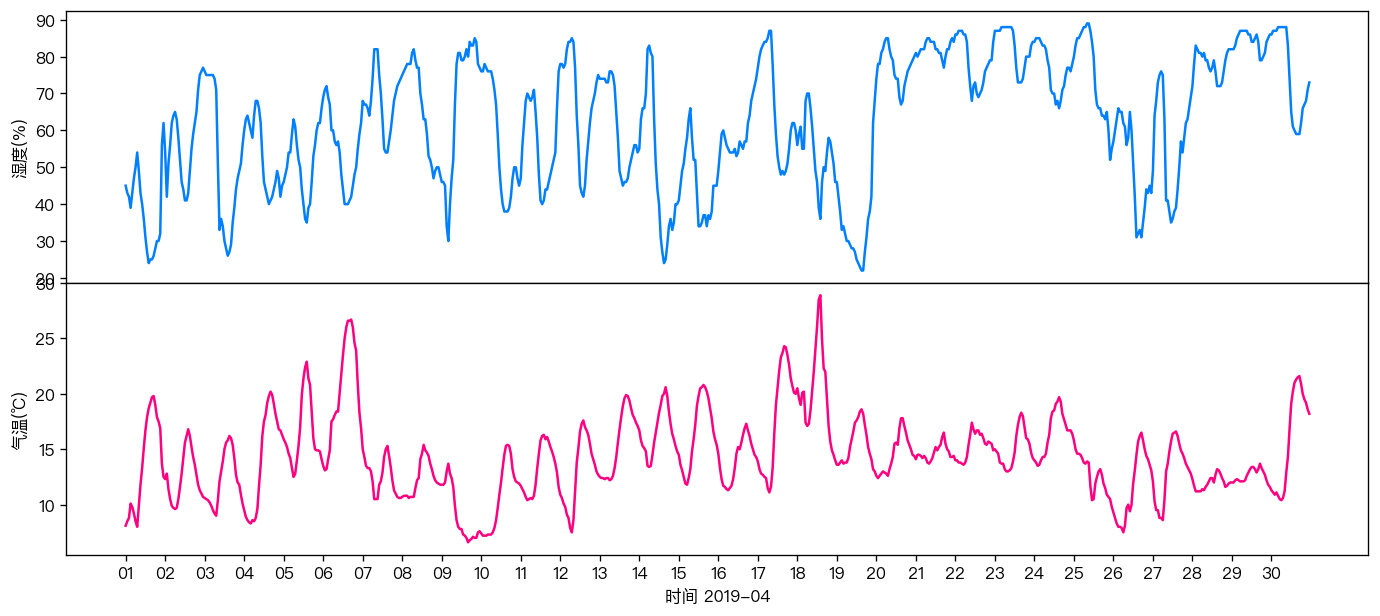

In [39]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(14, 6), dpi=120)
axes[1].plot(df.iloc[:, 0].to_numpy(), label='气温(℃)', c='#FF0080')
axes[0].plot(df.iloc[:, 1].to_numpy(), label='湿度(%)', c='#0080FF')
axes[1].set_xticks(ticks[::sep])
axes[1].set_xticklabels([xtick.strftime('%d') for xtick in list(df.index)[::sep]])
axes[1].set_xlabel('时间 2019-04')
# for ax in axes:
#     ax.legend(loc='upper left')
axes[0].set_ylabel('湿度(%)')
axes[1].set_ylabel('气温(℃)')
plt.subplots_adjust(hspace=0)
plt.show()